#**About Customer Spending Score Dataset**
**Variables** - There are 4 attributes in each case of the dataset. They are:
* Gender - Gender of customer either Male or Female.
* Age - Age of customer in completed years.
* Annual Income - Yearly income of customer in K$.
* Spending Score - Score of customer between 1 to 100.
###This data set is created only for the learning purpose of the customer segmentation concepts. I will demonstrate this by using unsupervised ML technique (Hierarchial Clustering Algorithm).

#**Importing Libraries**

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

#**Reading Data from Data Source**

In [24]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#**Exploring Data**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


#**Preprocessing as per requirement**

In [28]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(dtype=np.int64)
df[["Gender"]]=oe.fit_transform(df[["Gender"]])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [30]:
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]
x

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


##**Scaling of variables**

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_ss = ss.fit_transform(x[['Age']])
x_ss = pd.DataFrame(x_ss,columns=['Age'])
x_ss = pd.concat([x_ss, x[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]], axis=1)
x_ss

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.424569,1,15,39
1,-1.281035,1,15,81
2,-1.352802,0,16,6
3,-1.137502,0,16,77
4,-0.563369,0,17,40
...,...,...,...,...
195,-0.276302,0,120,79
196,0.441365,0,126,28
197,-0.491602,1,126,74
198,-0.491602,1,137,18


In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_x = min_max_scaler.fit_transform(x[['Annual Income (k$)', 'Spending Score (1-100)']])
min_max_x = pd.DataFrame(min_max_x,columns=['Annual Income (k$)', 'Spending Score (1-100)'])
new_x = pd.concat([x_ss[['Age', 'Gender']], min_max_x], axis=1)
new_x

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.424569,1,0.000000,0.387755
1,-1.281035,1,0.000000,0.816327
2,-1.352802,0,0.008197,0.051020
3,-1.137502,0,0.008197,0.775510
4,-0.563369,0,0.016393,0.397959
...,...,...,...,...
195,-0.276302,0,0.860656,0.795918
196,0.441365,0,0.909836,0.275510
197,-0.491602,1,0.909836,0.744898
198,-0.491602,1,1.000000,0.173469


#**Hierarchial Clustering showing relationship between columns**

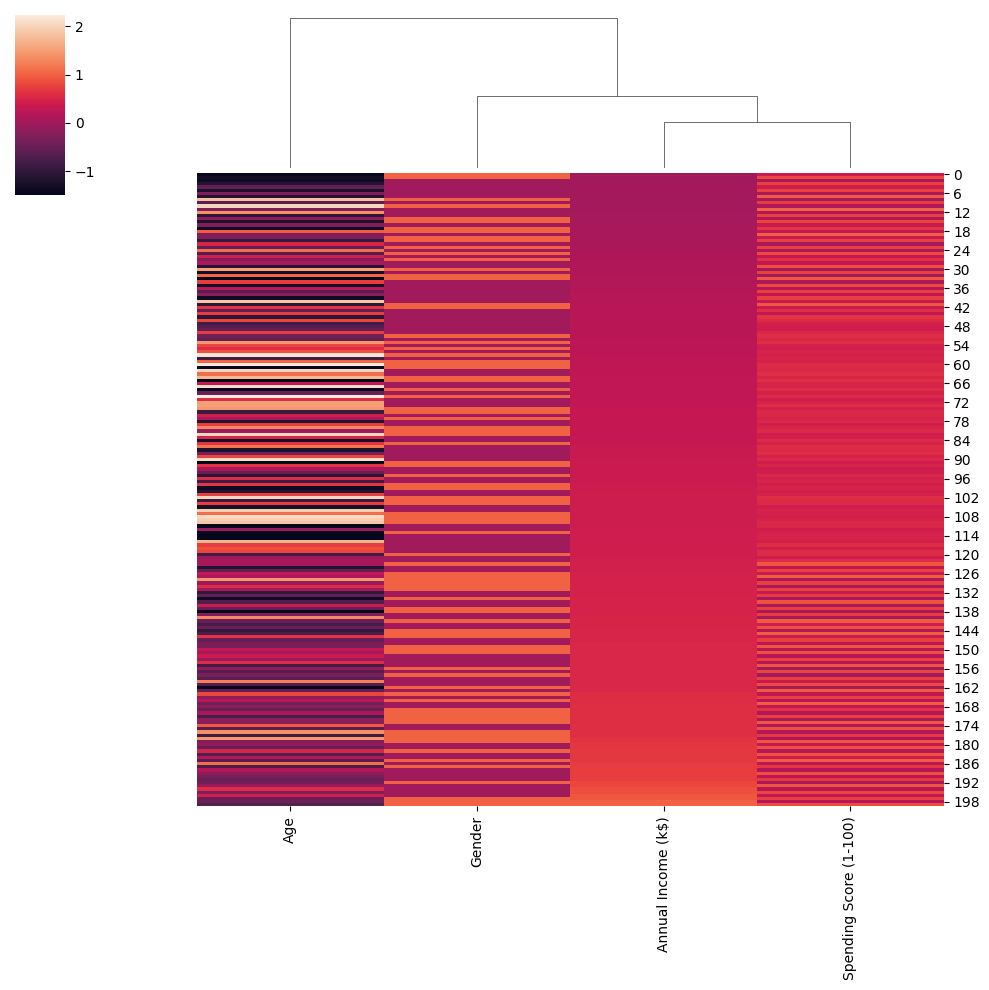

In [33]:
sns.clustermap(new_x,row_cluster=False)

#**Hierarchial Clustering showing relationship between observations**

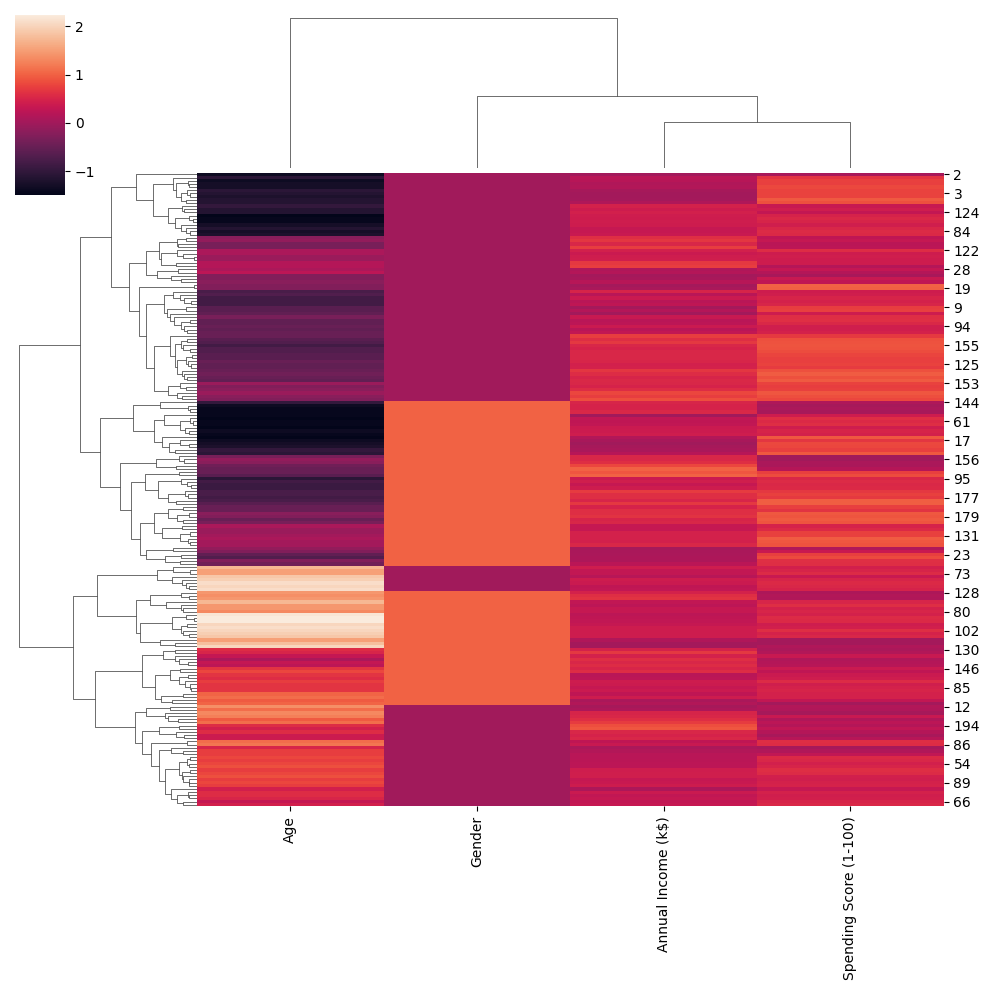

In [34]:
sns.clustermap(new_x,row_cluster=True)

#**Agglomerative (Hierarchial) Clustering**

In [35]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2,metric='euclidean')
cluster_labels=ac.fit_predict(new_x)

In [36]:
print(cluster_labels)

[0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0]


#**Visualizing the clusters**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

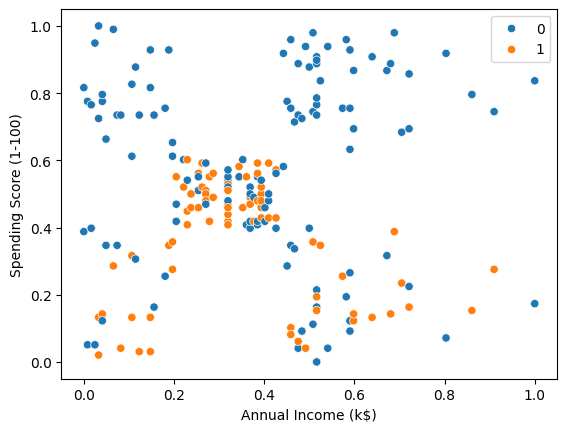

In [38]:
sns.scatterplot(x=new_x['Annual Income (k$)'], y=new_x['Spending Score (1-100)'], hue=cluster_labels)

#**3D Visualization of clusters**

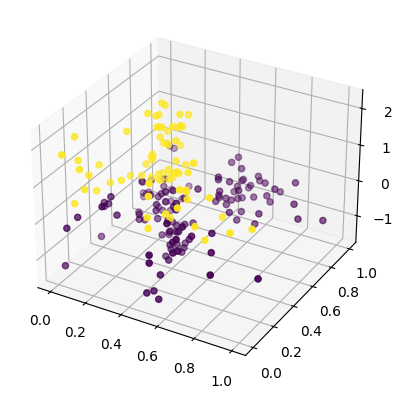

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_x['Annual Income (k$)'], new_x['Spending Score (1-100)'], new_x['Age'], c=cluster_labels)
plt.show()

#**Visualising similarity betweeen clusters**

<Axes: >

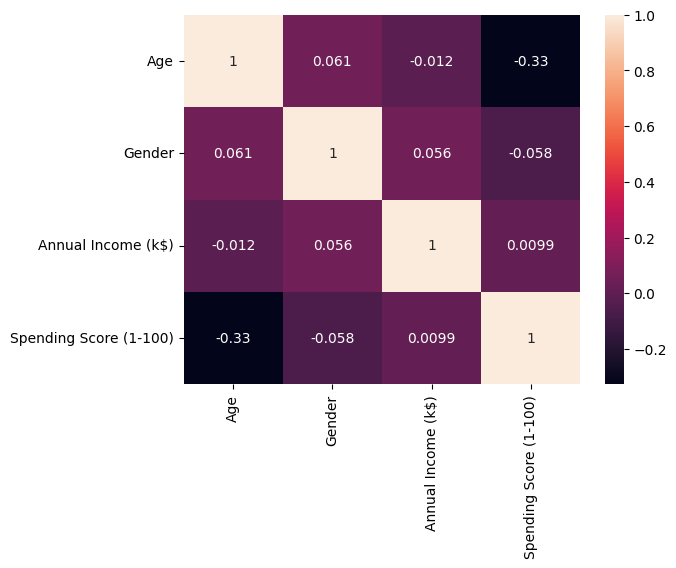

In [42]:
sns.heatmap(new_x.corr(), annot=True)